In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [136]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [137]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [138]:
df.shape

(103, 7)

### Data Cleaning

In [139]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [140]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [141]:
df.rename(columns = {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)": "Production per Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [142]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [143]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production per Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [144]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [145]:
df = df.dropna().reset_index()

In [146]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [147]:
df.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)

In [148]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [149]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production per Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [150]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production per Person(Kg)"] = df["Production per Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [151]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [152]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production per Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [153]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production per Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

### Analysis

In [154]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#### How many countries produce sugarcane from each continent?

In [155]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

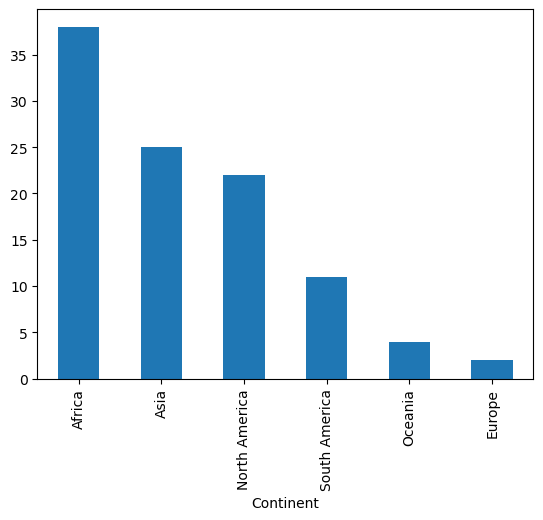

In [156]:
df["Continent"].value_counts().plot(kind = "bar")

C:\Users\hk821\AppData\Local\Temp\ipykernel_3292\2071364540.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\hk821\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hk821\AppData\Local\Temp\ipykernel_3292\2071364540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

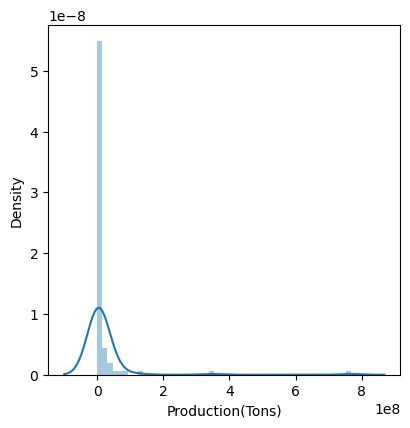

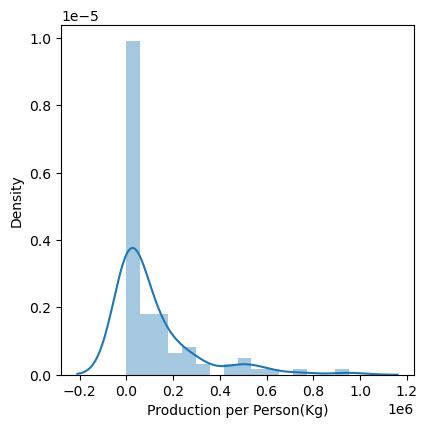

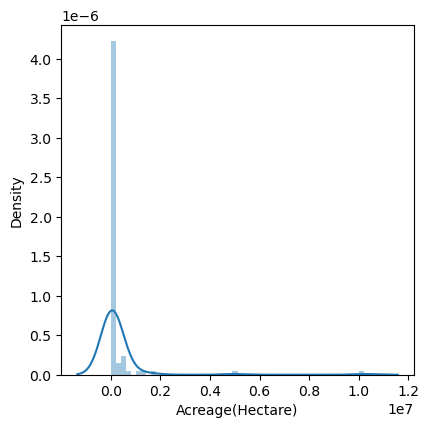

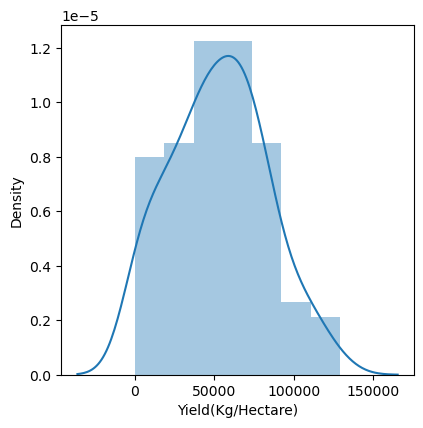

In [157]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.distplot(df["Production(Tons)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
sns.distplot(df["Production per Person(Kg)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
sns.distplot(df["Acreage(Hectare)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 4)
sns.distplot(df["Yield(Kg/Hectare)"])

<Axes: >

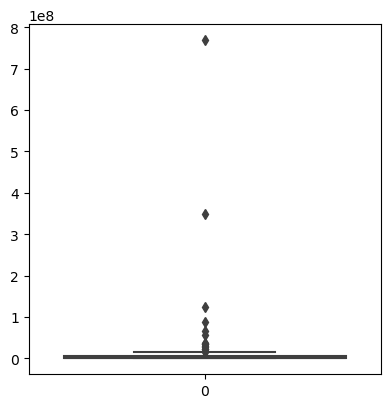

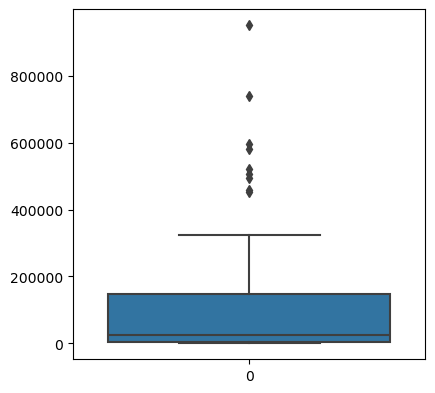

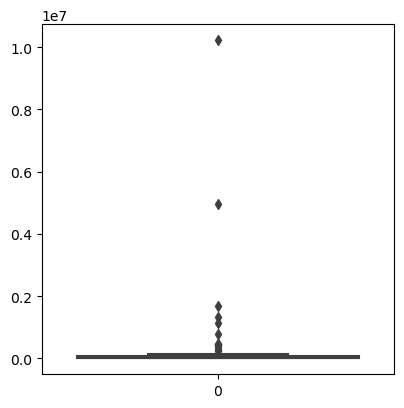

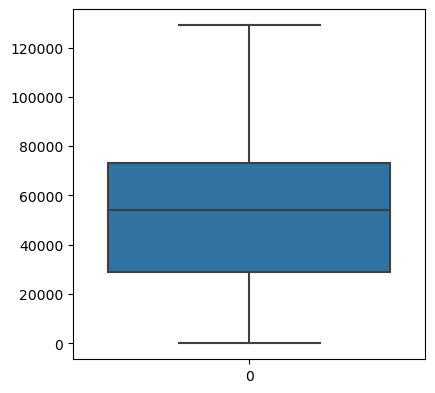

In [158]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(df["Production(Tons)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
sns.boxplot(df["Production per Person(Kg)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
sns.boxplot(df["Acreage(Hectare)"])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [159]:
df.describe()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [160]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugercane?

In [161]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [162]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [163]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [164]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

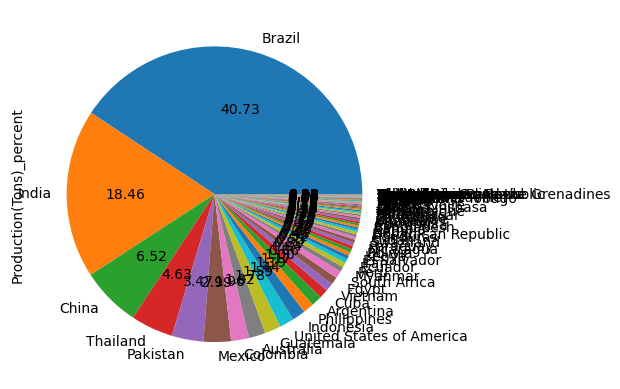

In [165]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

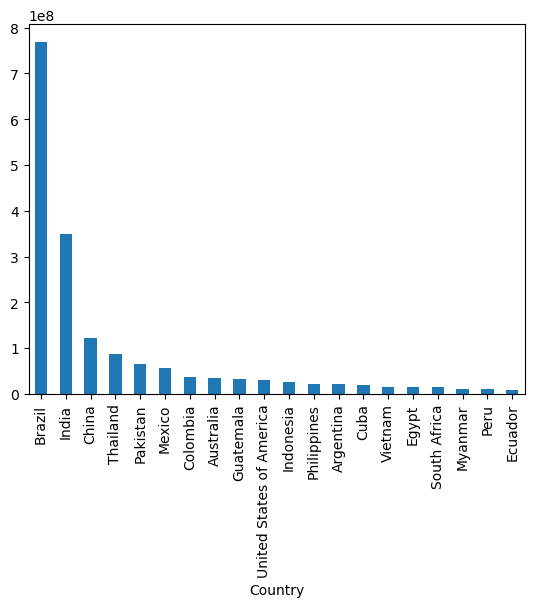

In [166]:
df_new["Production(Tons)"].head(20).plot(kind = "bar")

In [167]:
df.head(20)

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


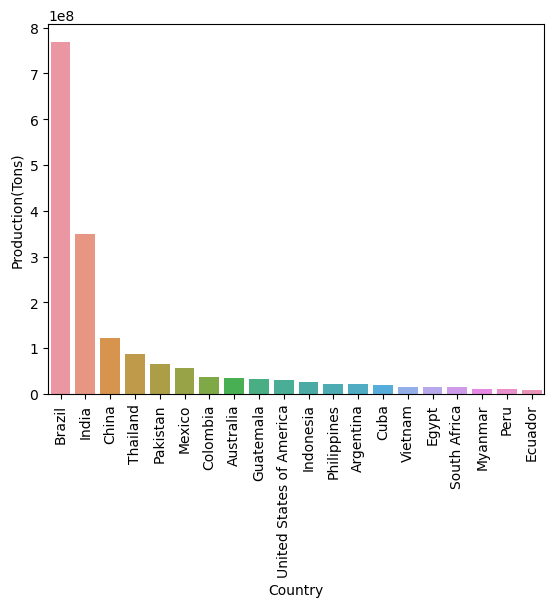

In [168]:
ax = sns.barplot(data = df.head(20), x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

#### Which country has highest land?

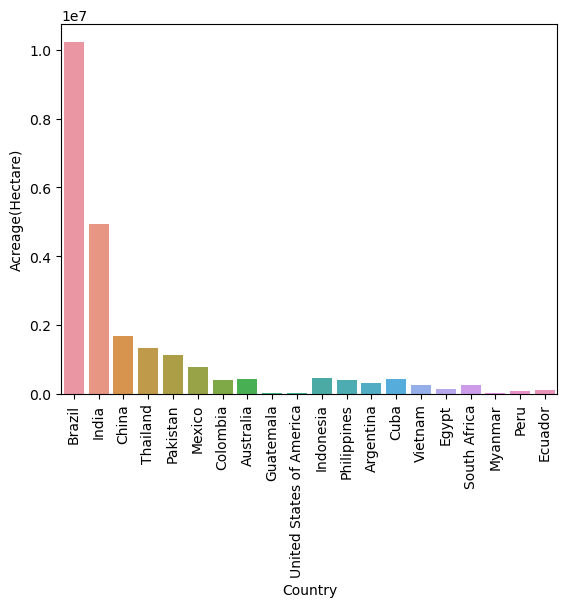

In [169]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False)
ax = sns.barplot(data = df.head(20), x = "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

#### Which country has highest yield per hectare?

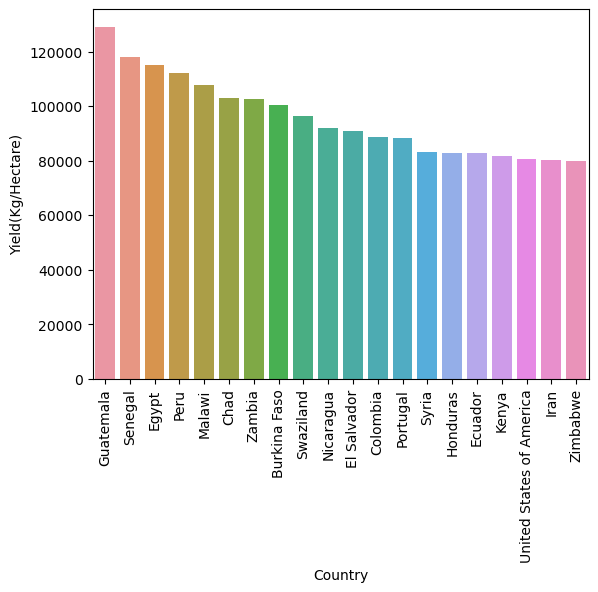

In [170]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False)
ax = sns.barplot(data = df_yield.head(20), x = "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

#### Which country has highest production?

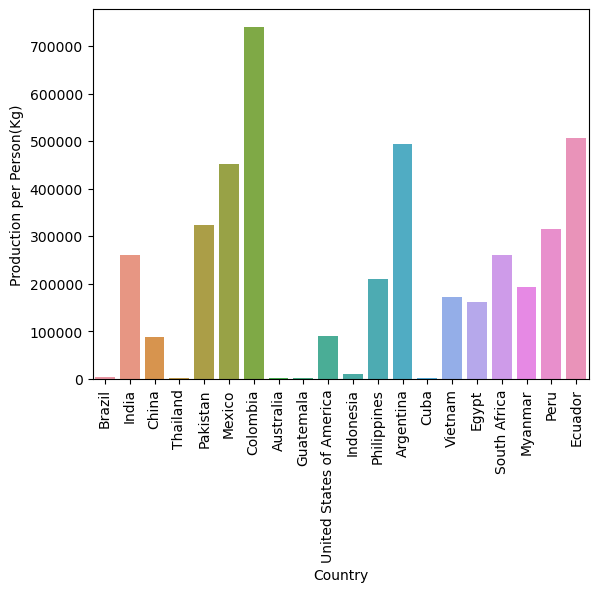

In [171]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False)
ax = sns.barplot(data = df.head(20), x = "Country", y = "Production per Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

#### Correlation

In [173]:
df.corr(numeric_only = True)

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production per Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

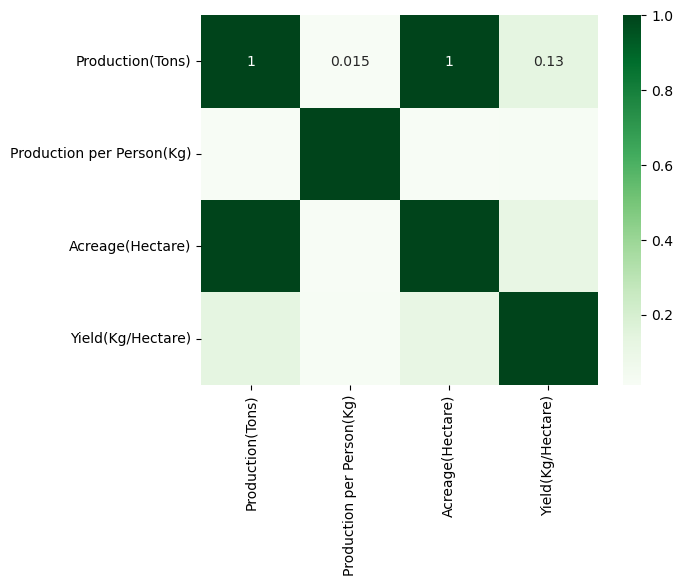

In [177]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "Greens")

#### Do countries with highest land produce more sugercane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

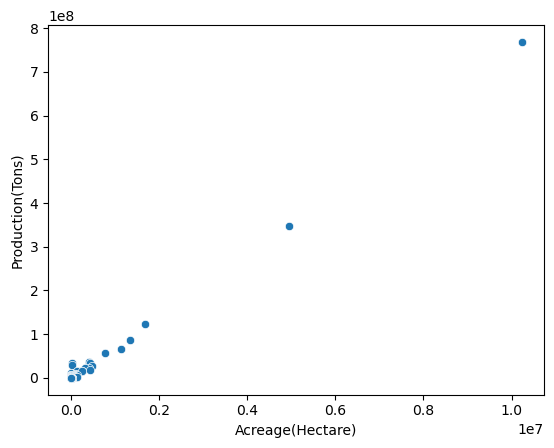

In [178]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)")

#### Do countries which yield more sugercane per hectare produces more sugercane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

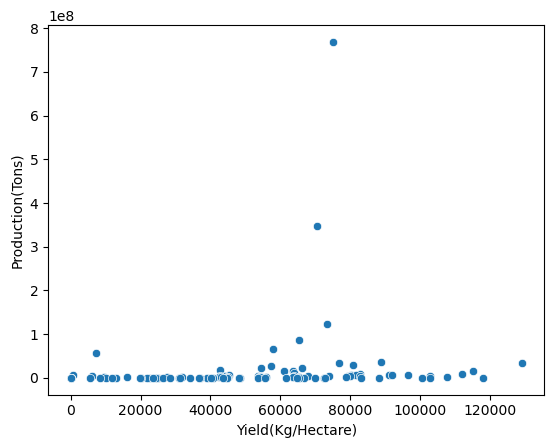

In [179]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)")

### Analysis for continent

In [181]:
df_continent = df.groupby("Continent").sum()

In [182]:
df_continent

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


#### Which continent produces maximum sugercane?

In [185]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

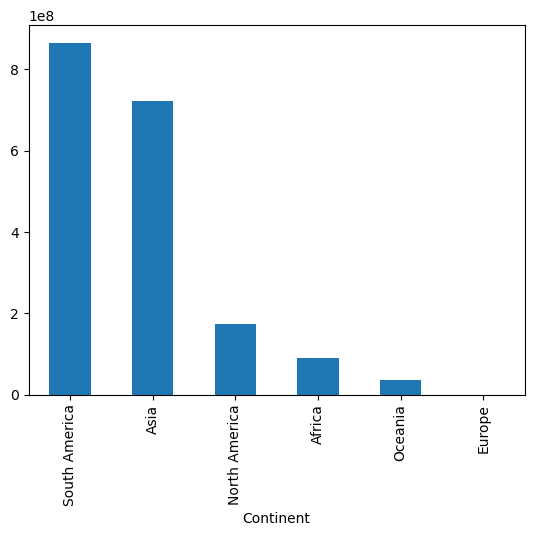

In [186]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='Continent'>

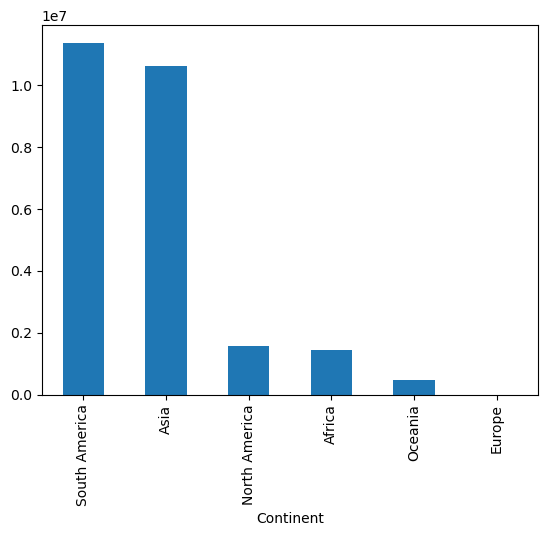

In [187]:
df_continent["Acreage(Hectare)"].sort_values(ascending = False).plot(kind = "bar")

#### Do number of countries in a Continent effects production of sugarcane?

In [191]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [192]:
df_continent

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


#### Do continent with highest land produces more sugarcane?

C:\Users\hk821\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hk821\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


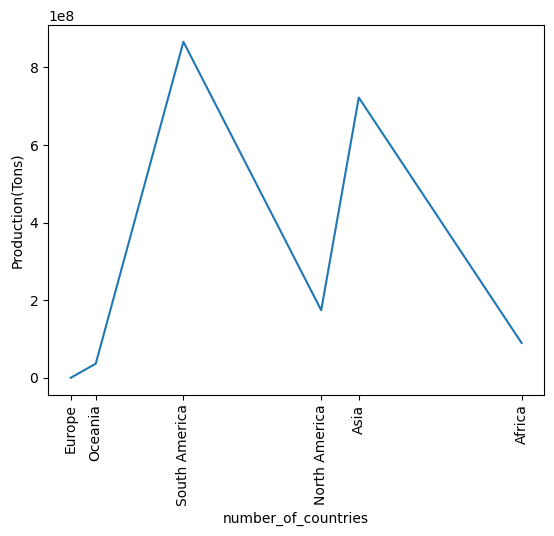

In [198]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = "number_of_countries", y = "Production(Tons)")
plt.xticks(df_continent["number_of_countries"], continent_names, rotation = 90)
plt.show()

#### Production distribution by continent

<Axes: ylabel='Production(Tons)'>

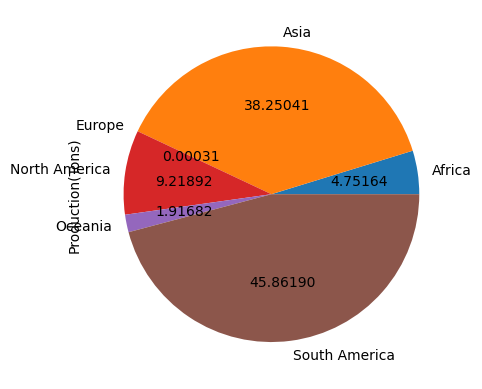

In [197]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.5f")

#### Correlation for continent

In [195]:
df_continent.corr(numeric_only = True)

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
